In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Load the cleaned dataset
df = pd.read_csv('final_cleaned.csv')

# Pivot the data to have pollutants as separate columns
df = df.pivot_table(values='value', index=['location', 'city', 'country', 'timestamp', 'latitude', 'longitude'], columns='pollutant').reset_index()

# Include pollutants and location, and drop rows with missing values
df = df[['latitude', 'longitude', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co']].dropna()

In [8]:
df.drop(columns=['latitude', 'longitude'], inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

In [15]:
df

pollutant,pm25,pm10,no2,so2,o3,co
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185
...,...,...,...,...,...,...
59334,7.62408,26.87570,31.00660,14.20000,30.4433,201.660
59335,7.76555,13.82210,9.43725,15.56760,54.1572,104.500
59336,10.57300,20.41160,9.41176,14.18960,46.3289,7.460
59337,13.52200,26.79870,23.86080,15.86660,87.1739,178.000


In [18]:
# Calculate percentiles for PM2.5 and PM10 within the dataset
pm25_33 = df['pm25'].quantile(0.33)
pm25_66 = df['pm25'].quantile(0.66)

pm10_33 = df['pm10'].quantile(0.33)
pm10_66 = df['pm10'].quantile(0.66)

# Define a categorization function based on these percentiles
def categorize_air_quality(row):
    if row['pm25'] <= pm25_33 and row['pm10'] <= pm10_33:
        return 'Low'
    elif (pm25_33 < row['pm25'] <= pm25_66) or (pm10_33 < row['pm10'] <= pm10_66):
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new target column
df['air_quality_category'] = df.apply(categorize_air_quality, axis=1)

# Check the distribution of the new target variable
print(df['air_quality_category'].value_counts())

air_quality_category
Medium    29318
High      16079
Low       13942
Name: count, dtype: int64


In [21]:
df.head()

pollutant,pm25,pm10,no2,so2,o3,co,air_quality_category
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522,Medium
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811,Low
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263,Medium
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714,Medium
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185,Medium


In [24]:
# Select features and label
X = df[['pm25', 'pm10', 'no2', 'so2', 'o3', 'co']]
y = df['air_quality_category']

In [27]:
X

pollutant,pm25,pm10,no2,so2,o3,co
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185
...,...,...,...,...,...,...
59334,7.62408,26.87570,31.00660,14.20000,30.4433,201.660
59335,7.76555,13.82210,9.43725,15.56760,54.1572,104.500
59336,10.57300,20.41160,9.41176,14.18960,46.3289,7.460
59337,13.52200,26.79870,23.86080,15.86660,87.1739,178.000


In [29]:
y

0        Medium
1           Low
2        Medium
3        Medium
4        Medium
          ...  
59334    Medium
59335    Medium
59336    Medium
59337    Medium
59338    Medium
Name: air_quality_category, Length: 59339, dtype: object

## Data Preparation

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
encoder = LabelEncoder()
df['air_quality_category_encoded'] = encoder.fit_transform(df['air_quality_category'])

# Define features and target
X = df.drop(columns=['air_quality_category', 'air_quality_category_encoded'])  # Features
y = df['air_quality_category_encoded']  # Encoded target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (47471, 6)
Testing features shape: (11868, 6)
Training target shape: (47471,)
Testing target shape: (11868,)


In [39]:
X_train.head()

pollutant,pm25,pm10,no2,so2,o3,co
14875,15.000,17.000,2.000000,3.000000,17.000000,100.00
20321,5.000,31.200,2.900000,3.200000,75.800000,140.00
58882,8.523,41.355,0.004008,0.014395,0.044314,0.23
18558,24.440,61.160,21.690000,1.320000,8.650000,610.00
8850,6.100,11.000,0.005000,0.001000,0.035000,0.14


In [42]:
y_train.head()

14875    2
20321    0
58882    2
18558    0
8850     1
Name: air_quality_category_encoded, dtype: int32

In [45]:
X_test.head()

pollutant,pm25,pm10,no2,so2,o3,co
16355,31.844,30.585,0.017317,0.012479,0.009611,0.669
17663,8.000,26.000,0.003000,0.000000,0.054000,0.150
33245,10.000,47.000,0.014000,0.000000,0.029000,0.080
15669,2.000,4.000,5.000000,2.000000,66.000000,100.000
34966,2.200,6.000,0.001000,0.000000,0.026000,0.120


In [48]:
y_test.head()

16355    2
17663    2
33245    2
15669    1
34966    1
Name: air_quality_category_encoded, dtype: int32

## XGBoost Implementation

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\thall\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validated Accuracy: 0.998019822835364


C:\Users\thall\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy with Best Parameters: 99.71%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3204
           1       1.00      1.00      1.00      2823
           2       1.00      1.00      1.00      5841

    accuracy                           1.00     11868
   macro avg       1.00      1.00      1.00     11868
weighted avg       1.00      1.00      1.00     11868



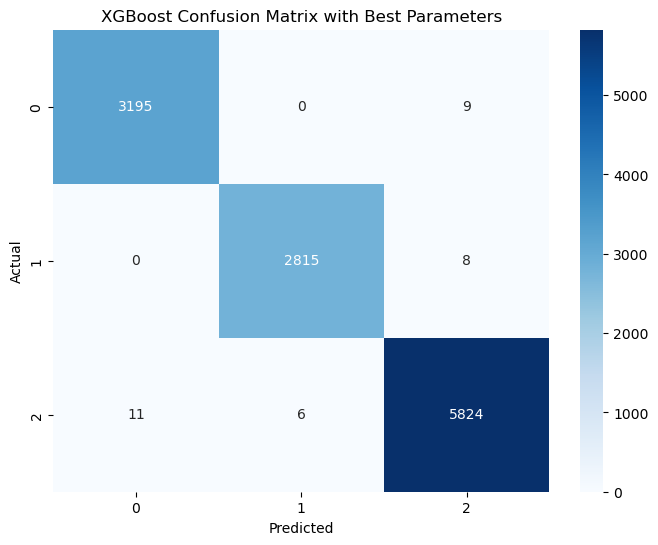

In [56]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have already prepared X_train, X_test, y_train, y_test

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 150],           # Number of trees
    'learning_rate': [0.1, 0.2],          # Learning rate (eta)
    'subsample': [0.8, 1.0],              # Fraction of samples used for training each tree
}

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Train the best model
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_xgb.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy with Best Parameters: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix with Best Parameters")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()